In [15]:
import re
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt

In [16]:
# Sample false positives load from txt file where separated by newline
with open("exp_output/model_FPs.txt", "r") as file:
    false_positives = file.read().splitlines()
false_positives

['',
 'addgene plasmid #25515',
 '8bi5',
 '8bi6',
 'https://doi.org/10.5061/dryad.h70rxwdmj',
 'gtex',
 'tcga',
 'https://doi.org/10.17632/7gmr9ws6sz.1',
 'pxd001714',
 'mtbls11979',
 'prjna1178314',
 'gse273052',
 'prjna1008987',
 'km277954',
 '10.17632/zgv3gpshpv.1',
 'mtbls12185',
 'gse247291',
 'phs000424.v10.p2',
 'at5g43940',
 'at1g20620',
 'at4g35090',
 'at1g19890',
 'up000241394',
 '6wm3',
 'srp017778',
 '6wm2',
 '6wm4',
 'https://vastdb.crg.eu/downloads/mm10/sample_info-mm10.tab.gz',
 'https://doi.org/10.17632/yw2bmrzx4c.1',
 'srp059242',
 'srp033517',
 '6vq8',
 'prjna1031176',
 '1m9o',
 'pxd051662',
 '1rgo',
 'prjna1163675',
 'gse197265',
 'gse36552',
 'omix007894',
 'gse228201',
 'gse138760',
 'gse283213',
 'hra008548',
 'pxd043363',
 'gse165782',
 'gse169632',
 'ckg',
 'sleep_ne_app_ps1',
 '7obs',
 '4jc3',
 '7obl',
 '7obd',
 'gse202350',
 '7obc',
 '7obg',
 '7ob5',
 '7obh',
 '7oby',
 '7obk',
 '7obt',
 '7obx',
 '7ob8',
 'pr002076',
 'prjna746094',
 'msv000087817',
 '43093558'

In [17]:
 # Define regex patterns for repositories
repo_patterns = {
    'PRIDE': r'^pxd\d+$',
    'MassIVE': r'^MSV\d+$',
    'GEO': r'^gse\d+$',
    'EGA': r'^egas\d+$',
    'dbGaP': r'^phs',
    'GenBank': r'^cp\d+\.\w+$',
    'BioProject': r'^prjna\d+$',
    'Zenodo': r'.*zenodo.*',
    'dryad': r'^10\.\d+/dryad\.\w+$',
    'Mendeley': r'10\.\d+/\w+\d+\w+\.\d+',
    'SRA': r'^srp\d+$|^dra\d+^srr\d+',
    'Metabolights': r'^mtbls\d+$',
    'ArrayExpress': r'^e\-mtab\-\d+$',
    'GitHub': r'^https?://github\.com/',
    'PDB': r'^pdb\-\w+$',
    'EMDB': r'^emd\-\d+$',
    'TCGA': r'^tcga',
    'GTEx': r'^gtex',
    'HGNC': r'^hgnc',
    'doi': r'.*10\.\d+\/.*',
}

# Classify false positives and count frequencies
repo_counts = defaultdict(int)

for fp in false_positives:
    classified = False
    #print(f"FP: {fp}") if '10.' in fp else None
    for repo, pattern in repo_patterns.items():
        if re.match(pattern, fp, re.IGNORECASE):
            repo_counts[repo] += 1
            classified = True
            print(f"Matced {repo}")
            break
    if not classified:
        print(f"Unmatched: {fp}")
        repo_counts['Other'] += 1

Unmatched: 
Unmatched: addgene plasmid #25515
Unmatched: 8bi5
Unmatched: 8bi6
Matced doi
Matced GTEx
Matced TCGA
Matced doi
Matced PRIDE
Matced Metabolights
Matced BioProject
Matced GEO
Matced BioProject
Unmatched: km277954
Matced Mendeley
Matced Metabolights
Matced GEO
Matced dbGaP
Unmatched: at5g43940
Unmatched: at1g20620
Unmatched: at4g35090
Unmatched: at1g19890
Unmatched: up000241394
Unmatched: 6wm3
Matced SRA
Unmatched: 6wm2
Unmatched: 6wm4
Unmatched: https://vastdb.crg.eu/downloads/mm10/sample_info-mm10.tab.gz
Matced doi
Matced SRA
Matced SRA
Unmatched: 6vq8
Matced BioProject
Unmatched: 1m9o
Matced PRIDE
Unmatched: 1rgo
Matced BioProject
Matced GEO
Matced GEO
Unmatched: omix007894
Matced GEO
Matced GEO
Matced GEO
Unmatched: hra008548
Matced PRIDE
Matced GEO
Matced GEO
Unmatched: ckg
Unmatched: sleep_ne_app_ps1
Unmatched: 7obs
Unmatched: 4jc3
Unmatched: 7obl
Unmatched: 7obd
Matced GEO
Unmatched: 7obc
Unmatched: 7obg
Unmatched: 7ob5
Unmatched: 7obh
Unmatched: 7oby
Unmatched: 7obk
U

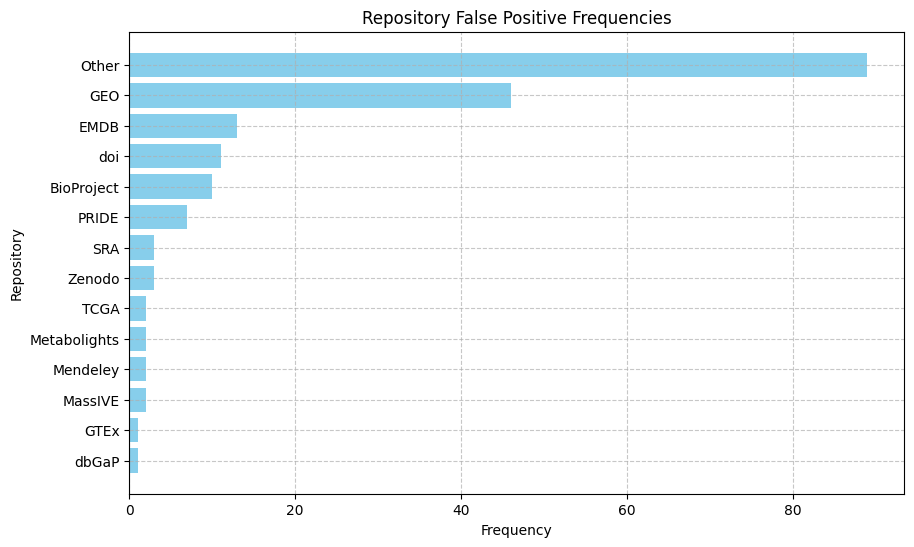

In [18]:
# Convert to DataFrame for display
repo_df = pd.DataFrame(list(repo_counts.items()), columns=['Repository', 'Frequency'])
repo_df.sort_values('Frequency', ascending=False, inplace=True)
# Display directly here# Plotting the frequencies
plt.figure(figsize=(10, 6))
plt.barh(repo_df['Repository'], repo_df['Frequency'], color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Repository')
plt.title('Repository False Positive Frequencies')
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

In [19]:
print(repo_df)

      Repository  Frequency
0          Other         89
7            GEO         46
12          EMDB         13
1            doi         11
6     BioProject         10
4          PRIDE          7
10           SRA          3
13        Zenodo          3
3           TCGA          2
5   Metabolights          2
8       Mendeley          2
11       MassIVE          2
2           GTEx          1
9          dbGaP          1
